### Optativa: Optimización en la Industria
### UNSL - 2023
# Práctico 3:
## Algoritmos Evolutivos

---

$\mathbf{Ejercicio} \,\,1$:  Dado el siguiente demo (https://rednuht.org/genetic_cars_2/), realizar un análisis de lo que muestra.

a. Indicar las variables de decisión que el Algoritmo Genético codifica en cada uno de sus individuos y si es posible, indicar el dominio de los valores respectivos.

b. ¿Respecto a la función de fitness, podría ser considerada un función de tipo "black-box"?. Justificar su respuesta.


---

$\mathbf{Respuesta}$

a. Variables de decisión:

   1. *Forma.* Dominio: $\R^+$.

   2. *Tamaño de las rueda.* Dominio: $\R^+$.

   3. *Posición de las ruedas.* Dominio: $\R^+$.

   4. *Densidad de las ruedas.* Dominio: Escala de grises.

   5. *Densidad del cuerpo.* Dominio: Colores.

b. En el demo proporcionado, la función de fitness mide el rendimiento o desempeño de cada individuo en el escenario de conducción simulado. La forma exacta de esta función de fitness no se conoce en detalle desde la perspectiva del observador externo al demo.

---

_________________________

$\mathbf{Ejercicio} \,\,2$: Analizar el código de "ga-oracion.py". Indicar lo que este programa realiza y dar una descripción de cómo aplica los operadores genéticos y lo que calcula la función de fitness. Pruebe el algoritmo para aprender una oración por Ud. establecida distinta a la que está escrita en el código provisto.

----

$\mathbf{Respuesta}$

Lo que realiza este programa es, dado un conjunto de genes, ir seleccionando la combinación que mas se aproxime al objetivo (String argumento de entrada).

Los operadores geneticos se aplican de la siguiente manera: En la operación de **selección** se selecciona solo el 10% de la población que tenga el mejor fitness, luego en el **Crossover** se seleccionan dos individuos de la población y de acuerdo a valores aleatorios se selecciona un gen del individuo1 o el individuo2 para formar el gen del hijo. En la **mutación** se selecciona un gen aleatorio y se lo reemplaza por otro.

Lo que calcula la operación de fitness es la cantidad de genes distintos que tiene el individuo, respecto al objetivo (TARGET). Por lo tanto, el indidviduo con menor fitness va a ser el mejor.

El código implementa un algoritmo genético básico para generar una cadena de caracteres que se aproxime al objetivo deseado. A medida que avanza en las generaciones, la población evoluciona a través del cruce y la mutación de los individuos para mejorar su aptitud en relación con el objetivo.
Utiliza la selección, la reproducción y la mutación para evolucionar la población y encontrar la solución óptima.

---

_________________________


$\mathbf{Ejercicio} \,\,3$: Analizar el código de "ga-simple.py". Indicar lo que este programa realiza y dar una descripción de cómo aplica los operadores genéticos y lo que calcula la función de fitness.
  

---

$\mathbf{Respuesta}$

El algoritmo implementa un GA para encontrar una solución óptima para un problema de optimización.

Lo que hace el algoritmo es acercarce (igualar) un vector de referencia (TARGET) que contiene en su chromosoma numeros binarios (0,1)

La funcion de fitness compara los genes del individuo respecto al TARGET. Si estos son iguales, entonces suma una unidad (MAXIMIZAR). y muestra un porcentaje del fitness respecto al 100%.

se procede a generar las nuevas generaciones:
    Se elige por torneo. el proceso es elegir 2 luchadores aleatorios, se compara su fitness y gana el mayor, por lo que se reetorna el cromosoma del ganador. PADRES.
    Se hace crossover con los padres, se selecciona un punto de quiebre y se juntan ambos padres 2 veces, por lo que se obtienen dos HIJOS. se añaden a la nueva poblacion.
    La nueva poblacion tiene la misma cantidad de indidviduos que la anterior.

Se le aplica mutacion a la nueva poblacion, cambia los genes de los individuos (los 0 (ceros) por 1 (unos) y los 1 (unos) por 0 (ceros)) aleatoriamente.

Este proceso se repite 200 veces.

En resumen, el código implementa un Algoritmo Genético para encontrar una solución óptima a un problema de optimización. Utiliza selección, cruce y mutación para evolucionar la población y mejorar la aptitud de los individuos en cada generación. El objetivo es encontrar el individuo con mayor similitud a una solución de referencia.
    
---     

_________________________

$\mathbf{Ejercicio} \,\,4$: Modifique el algoritmo "ga-simple.py" de manera que optimice la siguiente función objetivo:

$$
f(x_1, \dots, x_n) =  \sum_{i=1}^{n} sen^2(x_{i}),
$$
donde: $0 \leq x_i \leq \pi$ para $i=1, \dots, 75$.

Considere la posibilidad de que $n$ sea un parámetro del algoritmo elegido por el usuario cuyo valor esté en el siguiente rango $10 \leq n \leq 100$.


---

$\mathbf{Respuesta}$

Código fuente:

Ingrese un numero entre [10,100]: 30
Starting best score, % target:  43.731980971583354
End best score, % target:  8.837484185136498


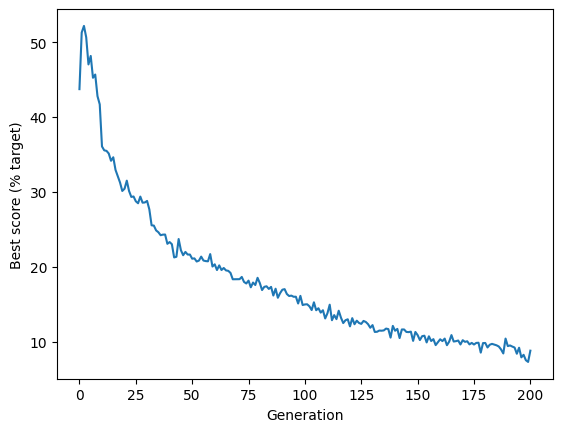

Press Enter to continue...


''

In [1]:
import random
import numpy as np
import math


def create_reference_solution(chromosome_length):
    return np.zeros(chromosome_length)


def create_starting_population(individuals, chromosome_length):
    return [
        [random.random() * math.pi for j in range(chromosome_length)]
        for i in range(individuals)
    ]


def calculate_fitness(population):
    return np.sum(
        np.array([[math.sin(gen) ** 2 for gen in ind] for ind in population]), axis=1
    )


def select_individual_by_tournament(population, scores):
    # Get population size
    population_size = len(scores)

    # Pick individuals for tournament
    fighter_1 = random.randint(0, population_size - 1)
    fighter_2 = random.randint(0, population_size - 1)

    # Get fitness score for each
    fighter_1_fitness = scores[fighter_1]
    fighter_2_fitness = scores[fighter_2]

    # Identify undividual with highest fitness
    # Fighter 1 will win if score are equal
    if fighter_1_fitness <= fighter_2_fitness:
        winner = fighter_1
    else:
        winner = fighter_2

    # Return the chromsome of the winner
    return population[winner]


def breed_by_crossover(parent_1, parent_2):
    # Get length of chromosome
    chromosome_length = len(parent_1)

    # Pick crossover point, avoding ends of chromsome
    crossover_point = random.randint(1, chromosome_length - 1)

    # Create children. np.hstack joins two arrays
    child_1 = np.hstack((parent_1[0:crossover_point], parent_2[crossover_point:]))

    child_2 = np.hstack((parent_2[0:crossover_point], parent_1[crossover_point:]))

    # Return children
    return child_1, child_2


def randomly_mutate_population(population, mutation_probability):
    # Apply random mutation
    random_mutation_array = np.random.random(size=(population.shape))

    random_mutation_boolean = random_mutation_array <= mutation_probability
    population[random_mutation_boolean] = [
        random.random() * math.pi
        for j in range(len(population[random_mutation_boolean]))
    ]

    # Return mutation population
    return population


# *************************************
# ******** MAIN ALGORITHM CODE ********
# *************************************

# Set general parameters
chromosome_length = 75
population_size = int(input("Ingrese un numero entre [10,100]: "))
maximum_generation = 200
best_score_progress = []  # Tracks progress

# Create reference solution
# (this is used just to illustrate GAs)
# TARGET
reference = create_reference_solution(chromosome_length)

# Create starting population
population = create_starting_population(population_size, chromosome_length)
# Display best score in starting population
scores = calculate_fitness(population)
best_score = np.min(scores) / chromosome_length * 100
print("Starting best score, % target: ", best_score)

# Add starting best score to progress tracker
best_score_progress.append(best_score)

# Now we'll go through the generations of genetic algorithm
for generation in range(maximum_generation):
    # Create an empty list for new population
    new_population = []

    # Create new popualtion generating two children at a time
    for i in range(int(population_size / 2)):
        parent_1 = select_individual_by_tournament(population, scores)
        parent_2 = select_individual_by_tournament(population, scores)
        child_1, child_2 = breed_by_crossover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)

    # Replace the old population with the new one
    population = np.array(new_population)

    # Apply mutation
    mutation_rate = 0.002
    population = randomly_mutate_population(population, mutation_rate)

    # Score best solution, and add to tracker
    scores = calculate_fitness(population)
    best_score = np.max(scores) / chromosome_length * 100
    best_score_progress.append(best_score)

# GA has completed required generation
print("End best score, % target: ", best_score)

# Plot progress
import matplotlib.pyplot as plt

plt.plot(best_score_progress)
plt.xlabel("Generation")
plt.ylabel("Best score (% target)")
plt.show()
input("Press Enter to continue...")

_________________________


$\mathbf{Ejercicio} \,\,5$:  Dado el código de programa "ga-oracion.py", se pide generar "ga-oracion-2.py" en el cual la
 función de fitness se construya considerando la suma acumulada de la distancia de los respectivos caracteres de un individuo corriente a la solución buscada (TARGET en el código).
Por ejemplo, si el invididuo corriente es "glna" y la solución TARGET es "casa" la suma de la distancia de "glna" a "casa" es: $dist(g,c) + dist(l,a) + dist(n,s) + dist(a,a)$. Aquí también se busca minimizar la función objetivo, tratando de llegar al valor 0.
¿Cuál de las dos versiones de estos algoritmos considera que es más efeciente? si es que encuentra alguna diferencia en los respectivos desempeños.


---

$\mathbf{Respuesta}$

Luego de varias ejecuciones, concluyo que la primer versión del algoritmo (ga-oracion.py) es mas eficiente que la segunda versión (ga-oracion-2.py) respecto a la cantidad de generaciones que necesitan para encontrar una solución optima.

Código fuente:


In [1]:
# Python3 program to create target string, starting from
# random string using Genetic Algorithm

import random
import math

# Number of individuals in each generation
POPULATION_SIZE = 100

# Valid genes
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

# Target string to be generated
TARGET = "River Campeon Copa Libertadores 2018"

class Individual(object):
	'''
	Class representing individual in population
	'''
	def __init__(self, chromosome):
		self.chromosome = chromosome
		self.fitness = self.cal_fitness()

	@classmethod
	def mutated_genes(self):
		'''
		create random genes for mutation
		'''
		global GENES
		gene = random.choice(GENES)
		return gene

	@classmethod
	def create_gnome(self):
		'''
		create chromosome or string of genes
		'''
		global TARGET
		gnome_len = len(TARGET)
		return [self.mutated_genes() for _ in range(gnome_len)]

	def mate(self, par2):
		'''
		Perform mating and produce new offspring
		'''

		# chromosome for offspring
		child_chromosome = []
		for gp1, gp2 in zip(self.chromosome, par2.chromosome):

			# random probability
			prob = random.random()

			# if prob is less than 0.45, insert gene
			# from parent 1
			if prob < 0.45:
				child_chromosome.append(gp1)

			# if prob is between 0.45 and 0.90, insert
			# gene from parent 2
			elif prob < 0.90:
				child_chromosome.append(gp2)

			# otherwise insert random gene(mutate),
			# for maintaining diversity
			else:
				child_chromosome.append(self.mutated_genes())

		# create new Individual(offspring) using
		# generated chromosome for offspring
		return Individual(child_chromosome)

	def cal_fitness(self):
		'''
		Calculate fittness score, it is the number of
		characters in string which differ from target
		string.
		'''
		global TARGET
		global GENES
		fitness = 0
		for gs, gt in zip(self.chromosome, TARGET):
			fitness += int(math.fabs(GENES.find(gs)-GENES.find(gt)))
		return fitness

# Driver code
def main():
	global POPULATION_SIZE

	#current generation
	generation = 1

	found = False
	population = []

	# create initial population
	# GENERACION DDE POBLACIÓN INICIAL
	for _ in range(POPULATION_SIZE):
				gnome = Individual.create_gnome()
				population.append(Individual(gnome))

	while not found:

		# sort the population in increasing order of fitness score
		population = sorted(population, key = lambda x:x.fitness)

		# if the individual having lowest fitness score ie.
		# 0 then we know that we have reached to the target
		# and break the loop
		if population[0].fitness <= 0:
			found = True
			break

		# Otherwise generate new offsprings for new generation
		new_generation = []

		# Perform Elitism, that mean 10% of fittest population
		# goes to the next generation
		# OPERACION DE SELECCION, LOS MEJORES 10% SEGUN FITNESS
		s = int((10*POPULATION_SIZE)/100)
		new_generation.extend(population[:s])

		# From 50% of fittest population, Individuals
		# will mate to produce offspring
		# OPERADORES GENETICOS, CROSSOVER Y MUTACION
		s = int((90*POPULATION_SIZE)/100)
		for _ in range(s):
			parent1 = random.choice(population[:50])
			parent2 = random.choice(population[:50])
			child = parent1.mate(parent2)
			new_generation.append(child)

		population = new_generation

		print("Generation: {}\tString: {}\tFitness: {}".format(generation,"".join(population[0].chromosome),
			population[0].fitness))

		generation += 1


	print("Generation: {}\tString: {}\tFitness: {}".format(generation, "".join(population[0].chromosome),
		population[0].fitness))

if __name__ == '__main__':
	main()

Generation: 1	String: R,M-D)HanVElkT[%%W)GYyyuZFhyrCOn;6FT	Fitness: 813
Generation: 2	String: #wEWv3bxPpYxTWNLHc. IX-)Bid;naS-J/tr	Fitness: 789
Generation: 3	String: PwuZ
3qvPpEAqKukqcQjm{h4 :wx:kaTJu3v	Fitness: 715
Generation: 4	String: "wmtC3qitrzzvMZCrCWliuz2FS09rWqP; tW	Fitness: 634
Generation: 5	String: 4wj-D3{aLteAkMzoBwWGivPt
FhysCES56([	Fitness: 502
Generation: 6	String: 4wj-D3{aLteAkMzoBwWGivPt
FhysCES56([	Fitness: 502
Generation: 7	String: 4wj-D3{aLteAkMzoBwWGivPt
FhysCES56([	Fitness: 502
Generation: 8	String: 4wj-D3{aLteAkMzoBwWGivPt
FhysCES56([	Fitness: 502
Generation: 9	String:  owlu1faitn2oMmwMlLGKpYu cTkszgT#}M8	Fitness: 476
Generation: 10	String: SHwlu1-ajtHmovHwMl1Gkpag
cfksagd#SM8	Fitness: 382
Generation: 11	String: SHwlu1-ajtHmovHwMl1Gkpag
cfksagd#SM8	Fitness: 382
Generation: 12	String: SHwlu1-ajtHmovHwMl1Gkpag
cfksagd#SM8	Fitness: 382
Generation: 13	String: SHwlu1-ajtHmovHwMl1Gkpag
cfksagd#SM8	Fitness: 382
Generation: 14	String:  oClD3qvLtnzoMkiqf1NivhuDPhvHfkF56X#	

_________________________

$\mathbf{Ejercicio} \,\,6$: Si deseamos usar el "ga-simple.py" para resolver el Problema de la Mochila, ¿qué sería necesario cambiar o tener en cuenta para poder lograrlo?

---

$\mathbf{Respuesta}$

Código fuente:


scores:  [450.0, 244.0, 62.0, 679.0, 711.0, 176.0, 0.0, 504.0, 2.0, 830.0, 192.0, 360.0, 98.0, 0.0, 45.0, 640.0, 388.0, 238.0, 464.0, 175.0, 549.0, 459.0, 144.0, 900.0, 252.0, 432.0, 384.0, 0.0, 48.0, 96.0, 90.0, 16.0, 156.0, 111.0, 126.0, 250.0, 36.0, 144.0, 930.0, 550.0, 352.0, 108.0, 0.0, 0.0, 0.0, 276.0, 27.0, 268.0, 168.0, 280.0, 126.0, 18.0, 295.0, 81.0, 378.0, 20.0, 152.0, 41.0, 135.0, 110.0, 380.0, 665.0, 380.0, 0.0, 176.0, 18.0, 384.0, 130.0, 185.0, 280.0, 196.0, 462.0, 0.0, 245.0, 99.0, 159.0, 160.0, 40.0, 12.0, 140.0, 756.0, 602.0, 72.0, 260.0, 0.0, 568.0, 88.0, 0.0, 330.0, 8.0, 73.0, 0.0, 444.0, 63.0, 204.0, 12.0, 165.0, 120.0, 0.0, 456.0, 4.0, 420.0, 14.0, 516.0, 225.0, 970.0, 240.0, 240.0, 660.0, 111.0, 201.0, 12.0, 32.0, 460.0, 450.0, 531.0, 500.0, 330.0, 110.0, 24.0, 99.0, 120.0, 147.0, 38.0, 72.0, 280.0, 66.0, 315.0, 0.0, 340.0, 148.0, 100.0, 57.0, 308.0, 176.0, 0.0, 581.0, 30.0, 76.0, 200.0, 156.0, 70.0, 282.0, 450.0, 92.0, 320.0, 56.0, 170.0, 12.0, 66.0, 117.0, 464.0

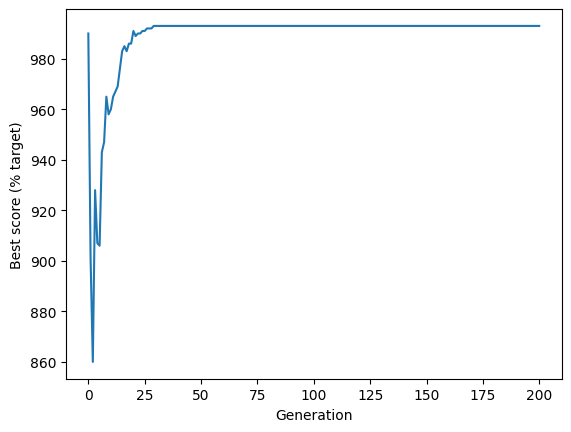

Press Enter to continue...


''

In [7]:
import random
import numpy as np

FIN = False


def create_reference_solution(chromosome_length):
    number_of_ones = int(chromosome_length / 2)

    # Build an array with an equal mix of zero and ones
    reference = np.zeros(chromosome_length)
    reference[0:number_of_ones] = 1

    # Shuffle the array to mix the zeros and ones
    np.random.shuffle(reference)
    return reference


def create_starting_population(individuals, chromosome_length):
    # Set up an initial array of all zeros
    population = np.zeros((individuals, chromosome_length))
    # Loop through each row (individual)
    for i in range(individuals):
        # Choose a random number of ones to create
        ones = random.randint(0, chromosome_length)
        # Change the required number of zeros to ones
        population[i, 0:ones] = 1
        # Sfuffle row
        np.random.shuffle(population[i])
        population[i] = population[i] * random.randint(1, 100)
    return population


def calculate_fitness(C, population):
    fitness_scores = []
    score = 0
    global FIN
    for individuo in population:
        for gen in individuo:
            score += gen
            pass
        if score == C:
            FIN = True
        else:
            if score > C:
                score = 0
        fitness_scores.append(score)
        score = 0

    return fitness_scores


def select_individual_by_tournament(population, scores):
    # Get population size
    population_size = len(scores)

    # Pick individuals for tournament
    fighter_1 = random.randint(0, population_size - 1)
    fighter_2 = random.randint(0, population_size - 1)

    # Get fitness score for each
    fighter_1_fitness = scores[fighter_1]
    fighter_2_fitness = scores[fighter_2]

    # Identify undividual with highest fitness
    # Fighter 1 will win if score are equal
    if fighter_1_fitness >= fighter_2_fitness:
        winner = fighter_1
    else:
        winner = fighter_2

    # Return the chromsome of the winner
    return population[winner, :]


def breed_by_crossover(parent_1, parent_2):
    # Get length of chromosome
    chromosome_length = len(parent_1)

    # Pick crossover point, avoding ends of chromsome
    crossover_point = random.randint(1, chromosome_length - 1)

    # Create children. np.hstack joins two arrays
    child_1 = np.hstack((parent_1[0:crossover_point], parent_2[crossover_point:]))

    child_2 = np.hstack((parent_2[0:crossover_point], parent_1[crossover_point:]))

    # Return children
    return child_1, child_2


def randomly_mutate_population(population, mutation_probability):
    # Apply random mutation
    random_mutation_array = np.random.random(size=(population.shape))

    random_mutation_boolean = random_mutation_array <= mutation_probability

    population[random_mutation_boolean] = np.logical_not(
        population[random_mutation_boolean]
    )

    # Return mutation population
    return population


# *************************************
# ******** MAIN ALGORITHM CODE ********
# *************************************

# Set general parameters
C = 3243
chromosome_length = 10  # n
population_size = 500
maximum_generation = 200
best_score_progress = []  # Tracks progress

# Create reference solution
# (this is used just to illustrate GAs)
# TARGET
# reference = create_reference_solution(chromosome_length)

# Create starting population
population = create_starting_population(population_size, chromosome_length)
# Display best score in starting population
scores = calculate_fitness(C, population)
best_score = np.max(scores)
print("scores: ", scores)
print("Starting best score: ", best_score)

# Add starting best score to progress tracker
best_score_progress.append(best_score)

# Now we'll go through the generations of genetic algorithm
generation = 0
while generation < maximum_generation:
    # Create an empty list for new population
    new_population = []

    # Create new popualtion generating two children at a time
    for i in range(int(population_size / 2)):
        parent_1 = select_individual_by_tournament(population, scores)
        parent_2 = select_individual_by_tournament(population, scores)
        child_1, child_2 = breed_by_crossover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)

    # Replace the old population with the new one
    population = np.array(new_population)

    # Apply mutation
    mutation_rate = 0.002
    population = randomly_mutate_population(population, mutation_rate)

    # Score best solution, and add to tracker
    scores = calculate_fitness(C, population)
    best_score = np.max(scores)
    best_score_progress.append(best_score)
    generation += 1

# GA has completed required generation
print("End best score", best_score)
print("config:", population[scores.index(np.max(scores))])

# Plot progress
import matplotlib.pyplot as plt

plt.plot(best_score_progress)
plt.xlabel("Generation")
plt.ylabel("Best score (% target)")
plt.show()
input("Press Enter to continue...")

_________________________

$\mathbf{Ejercicio} \,\,7$: Idem anterior para el Problema de Viajante de Comercio.

---

$\mathbf{Respuesta}$

Código fuente:

[(84, 12), (65, 41), (63, 98), (100, 68), (70, 32), (81, 41), (79, 97), (65, 96), (81, 58), (93, 21), (84, 3), (77, 68), (84, 76), (91, 38), (91, 8), (84, 41), (100, 63), (60, 79), (75, 96), (79, 89)]
Starting best score:  499.51213250576194

End best score: 256.28450938174126


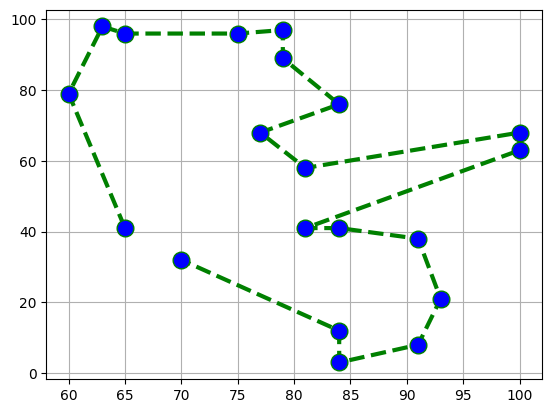

In [10]:
import random
import numpy as np
import math


def create_starting_population(individuals, chromosome_length, cities):
    # Set up an initial array of all zeros
    population = []
    individual = []
    # Loop through each row (individual)
    for i in range(individuals):
        for j in range(len(cities)):
            individual.append(j)
        np.random.shuffle(individual)
        population.append(individual.copy())
        individual.clear()

    return population

def calculeDistance(citie1, citie2):
        return math.sqrt((citie1[0]-citie2[0])**2+(citie1[1]-citie2[1])**2)

def calculate_fitness(population, cities):
    fitness_scores = []
    for i in range(len(population)):
        fitness_scores.append(0)
        for j in range(len(cities)-1):
            fitness_scores[i] += calculeDistance(cities[population[i][j]],cities[population[i][j+1]])

    return fitness_scores


def select_individual_by_tournament(population, scores):
    # Get population size
    population_size = len(scores)

    # Pick individuals for tournament
    fighter_1 = random.randint(0, population_size-1)
    fighter_2 = random.randint(0, population_size-1)

    # Get fitness score for each
    fighter_1_fitness = scores[fighter_1]
    fighter_2_fitness = scores[fighter_2]

    # Identify undividual with highest fitness
    # Fighter 1 will win if score are equal
    if fighter_1_fitness <= fighter_2_fitness:
        winner = fighter_1
    else:
        winner = fighter_2

    # Return the chromsome of the winner
    return population[winner]


def breed_by_crossover(parent_1, parent_2):
    child_1 = []
    child_2 = []
    # Get length of chromosome
    chromosome_length = len(parent_1)

    # Pick crossover point, avoding ends of chromsome
    crossover_point = random.randint(1,chromosome_length-1)

    for i in range(crossover_point):
        child_1.append(parent_1[i])

    index = 0
    while len(child_1) < chromosome_length:
        if parent_2[index] not in child_1:
            child_1.append(parent_2[index])
        index+=1

    for i in range(crossover_point):
        child_2.append(parent_2[i])

    index = 0
    while len(child_2)<chromosome_length:
        if parent_1[index] not in child_2:
            child_2.append(parent_1[index])
        index+=1

    # Return children
    return child_1, child_2


def randomly_mutate_population(population, mutation_probability):

    # Apply random mutation
    for i in range(len(population)):
        if random.random() <= 0.05:
            a = random.randint(0,len(population[i])-1)
            b = random.randint(0,len(population[i])-1)
            temp = population[i][a]
            population[i][a] = population[i][b]
            population[i][b] = temp

    return population

def minScore(scores):
    minimScore = scores[0]
    index = 0
    for i in range(len(scores)):
        if scores[i] < minimScore:
            minimScore = scores[i]
            index = i
    return minimScore, index


# *************************************
# ******** MAIN ALGORITHM CODE ********
# *************************************

# Set general parameters
chromosome_length = 20
population_size = 100
maximum_generation = 2000
best_score_progress = [] # Tracks progress
cities = []
for i in range(chromosome_length):
    cities.append((random.randint(50,100),random.randint(0,100)))
print(cities)
# Create starting population
population = create_starting_population(population_size, chromosome_length, cities)
# Display best score in starting population
scores = calculate_fitness(population,cities)
best_score = np.min(scores)

print ('Starting best score: ',best_score)

# Add starting best score to progress tracker
best_score_progress.append(best_score)

# Now we'll go through the generations of genetic algorithm
for generation in range(maximum_generation):
    # Create an empty list for new population
    new_population = []

    # Create new popualtion generating two children at a time
    for i in range(int(population_size/2)):
        parent_1 = select_individual_by_tournament(population, scores)
        parent_2 = select_individual_by_tournament(population, scores)
        child_1, child_2 = breed_by_crossover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)

    # Replace the old population with the new one
    population = np.array(new_population)

    # Apply mutation
    mutation_rate = 0.005
    population = randomly_mutate_population(population, mutation_rate)

    # Score best solution, and add to tracker
    scores = calculate_fitness(population, cities)
    best_score, indexBestScore = minScore(scores)
    best_score_progress.append(best_score)
    bestTravel = population[indexBestScore]

# GA has completed required generation
print ('\nEnd best score:', best_score)

# Plot progress
import matplotlib.pyplot as plt

x = []
y = []

travelPath = []
for i in range(chromosome_length):
    travelPath.append(cities[bestTravel[i]])

for citie in travelPath:
    x.append(citie[0])
    y.append(citie[1])
    pass
plt.plot(x,y,color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.grid()
plt.show()